<a href="https://colab.research.google.com/github/josephfrancis22/Global-weather-prediction-/blob/main/jf_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MILESTONE 1**

 Data Preparation & Initial Analysis (Weeks 1-2)
● Tasks:
○ Download the Global Weather Repository dataset from Kaggle.
○ Set up project environment.
○ Inspect dataset structure, data types, and key variables.
○ Identify missing values, anomalies, and data coverage.
○ Handle missing or inconsistent entries.
○ Convert units and normalize values.
○ Aggregate or filter data (e.g., daily to monthly averages).
● Evaluation:
○ Deliverable: Cleaned and preprocessed dataset, along with a summary
document outlining data schema, key variables, and data quality issues.
○ Success Criteria: Dataset is successfully downloaded, cleaned, and
transformed into a usable format, ready for analysis.

In [ ]:
#unzip zip file
!unzip "/content/archive (4).zip"

Archive:  /content/archive (4).zip
  inflating: GlobalWeatherRepository.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/GlobalWeatherRepository.csv")

inspecting data

In [ ]:
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,Venezuela,Caracas,10.50,-66.92,America/Caracas,1694558700,2023-09-12 18:45,31.0,87.8,Clear,...,46.1,48.1,3,5,06:17 AM,06:30 PM,04:23 AM,05:13 PM,Waning Crescent,8
3115,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1694558700,2023-09-13 05:45,25.0,77.0,Light rain,...,45.2,48.9,3,5,05:43 AM,06:03 PM,03:11 AM,04:39 PM,Waning Crescent,8
3116,Yemen,Sanaa,15.35,44.21,Asia/Aden,1694558700,2023-09-13 01:45,18.5,65.3,Clear,...,29.8,73.6,2,3,05:52 AM,06:07 PM,03:36 AM,04:43 PM,Waning Crescent,8
3117,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1694558700,2023-09-13 00:45,22.2,72.0,Clear,...,20.6,26.9,2,2,06:05 AM,06:02 PM,04:30 AM,04:06 PM,Waning Crescent,8


In [ ]:
data.shape

(3119, 41)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       3119 non-null   object 
 1   location_name                 3119 non-null   object 
 2   latitude                      3119 non-null   float64
 3   longitude                     3119 non-null   float64
 4   timezone                      3119 non-null   object 
 5   last_updated_epoch            3119 non-null   int64  
 6   last_updated                  3119 non-null   object 
 7   temperature_celsius           3119 non-null   float64
 8   temperature_fahrenheit        3119 non-null   float64
 9   condition_text                3119 non-null   object 
 10  wind_mph                      3119 non-null   float64
 11  wind_kph                      3119 non-null   float64
 12  wind_degree                   3119 non-null   int64  
 13  win

In [ ]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [ ]:
print(data.iloc[10:5:-1])

       country location_name  latitude  longitude  \
10  Azerbaijan          Baku     40.40      49.88   
9      Austria        Vienna     48.20      16.37   
8    Australia      Canberra    -35.28     149.22   
7      Armenia       Yerevan     40.18      44.51   
6    Argentina  Buenos Aires    -34.59     -58.67   

                          timezone  last_updated_epoch      last_updated  \
10                       Asia/Baku          1693301400  2023-08-29 13:30   
9                    Europe/Vienna          1693301400  2023-08-29 11:30   
8                 Australia/Sydney          1693301400  2023-08-29 19:30   
7                     Asia/Yerevan          1693301400  2023-08-29 13:30   
6   America/Argentina/Buenos_Aires          1693301400  2023-08-29 06:30   

    temperature_celsius  temperature_fahrenheit condition_text  ...  \
10                 31.0                    87.8          Sunny  ...   
9                  16.0                    60.8     Light rain  ...   
8          

missing values


In [ ]:
data.isnull().sum()
#we found that ,no missing value in this data set

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
# Fill missing values with mean if column exists
if "temperature_celsius" in data.columns:
    data["temperature_celsius"] = data["temperature_celsius"].fillna(data["temperature_celsius"].mean())

if "temperature_fahrenheit" in data.columns:
    data["temperature_fahrenheit"] = data["temperature_fahrenheit"].fillna(data["temperature_fahrenheit"].mean())




handling anomalies

In [ ]:
#Detect anomalies using IQR method (for all numeric columns)
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data = remove_outliers_iqr(data, col)

In [ ]:
# Fill missing values in all numeric columns with their mean
data = data.fillna(data.mean(numeric_only=True))


aggregate and filteing data

In [ ]:
#  Aggregate daily → monthly averages
if "date" in data.columns:
    # 1. Convert to datetime format
    data["date"] = pd.to_datetime(data["date"], errors="coerce")

    # 2. Extract year-month period
    data["year_month"] = data["date"].dt.to_period("M")

    # 3. Group by year-month and calculate averages
    monthly_data = data.groupby("year_month").mean(numeric_only=True).reset_index()
else:
    monthly_data = None


In [ ]:
#agrregate by season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

if "date" in data.columns:
    data["month"] = data["date"].dt.month
    data["season"] = data["month"].apply(get_season)
    season_data = data.groupby("season").mean(numeric_only=True).reset_index()


In [ ]:
# filter for extreme weather
if "temperature_celsius" in data.columns:
    hot_days = data[data["temperature_celsius"] > 40]
    print(len(hot_days))

if "precipitation" in data.columns:
    heavy_rain_days = data[data["precipitation"] > 100]
    print("Total heavy rain days:", len(heavy_rain_days))


752


In [ ]:
# Save the cleaned dataset
data.to_csv("Cleaned_GlobalWeatherRepository.csv", index=False)

# Save the monthly dataset if it exists
if 'monthly_data' in locals() and monthly_data is not None:
    monthly_data.to_csv("Monthly_GlobalWeather.csv", index=False)

print("✅ Milestone 1 complete: Cleaned datasets saved.")



✅ Milestone 1 complete: Cleaned datasets saved.


# MILESTONE 2

Core Analysis & Visualization Design (Weeks 2-4)
● Tasks:
○ Perform statistical analysis to understand distributions, correlations, seasonal
patterns, and trends.
○ Identify extreme weather events.
○ Compare weather conditions across regions.
○ Select suitable visualization types (e.g., Choropleth maps, Line charts,
Scatterplots, Heatmaps).
○ Design an interactive dashboard layout (wireframes/mockups).
● Evaluation:
○ Deliverable: A report detailing analytical findings (statistical summaries, trends,
extreme events, comparative analysis) and a set of wireframes/mockups for the
dashboard.
○ Success Criteria: Clear analytical insights are derived and documented.
Dashboard design effectively communicates planned insights with appropriate
visualization choices.


In [ ]:
# Perform statistical analysis
display(data.describe())

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,3119.000000,3119.000000,3.119000e+03,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,...,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000
mean,19.305752,21.809503,1.693916e+09,22.483071,72.469702,6.513113,10.480507,163.006412,1013.486053,29.926935,...,17.042706,488.353735,40.511927,10.644149,6.361654,20.160596,32.485123,1.475152,2.075986,65.051619
std,24.580523,65.663249,3.924815e+05,6.518389,11.733357,4.507929,7.256625,103.023288,5.774775,0.170292,...,10.934776,956.544168,32.555910,18.926706,14.335974,52.130692,70.270928,0.909614,2.191373,32.422804
min,-41.300000,-175.200000,1.693301e+09,-2.000000,28.400000,2.200000,3.600000,1.000000,992.000000,29.300000,...,0.000000,123.500000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,8.000000
25%,3.750000,-6.840000,1.693568e+09,17.900000,64.200000,2.900000,4.700000,75.000000,1010.000000,29.830000,...,9.000000,223.600000,17.900000,1.100000,0.400000,3.100000,5.600000,1.000000,1.000000,34.500000
50%,17.250000,23.240000,1.693956e+09,23.000000,73.400000,5.400000,8.600000,157.000000,1013.000000,29.910000,...,15.100000,270.400000,36.100000,3.800000,1.400000,7.600000,12.800000,1.000000,1.000000,70.000000
75%,41.330000,50.580000,1.694257e+09,27.500000,81.500000,8.900000,14.400000,240.000000,1017.000000,30.030000,...,22.500000,427.300000,55.100000,11.800000,5.400000,18.400000,29.050000,2.000000,2.000000,94.000000
max,63.830000,179.220000,1.694559e+09,45.000000,113.000000,43.800000,70.600000,360.000000,1036.000000,30.590000,...,110.500000,18158.000000,320.400000,241.300000,169.800000,895.100000,1079.100000,6.000000,10.000000,100.000000


In [ ]:
# Identify Extreme Weather Events

# Extreme Heat (e.g., temperature > 40°C)
extreme_heat = data[data['temperature_celsius'] > 40]
print("Extreme Heat Events (Temperature > 40°C):")
display(extreme_heat[['country', 'location_name', 'last_updated', 'temperature_celsius']])

# Extreme Cold (e.g., temperature < 0°C)
extreme_cold = data[data['temperature_celsius'] < 0]
print("\nExtreme Cold Events (Temperature < 0°C):")
display(extreme_cold[['country', 'location_name', 'last_updated', 'temperature_celsius']])

# Heavy Rain (e.g., precip_mm > 10)
heavy_rain = data[data['precip_mm'] > 10]
print("\nHeavy Rain Events (Precipitation > 10mm):")
display(heavy_rain[['country', 'location_name', 'last_updated', 'precip_mm']])

# High Wind (e.g., wind_kph > 50)
high_wind = data[data['wind_kph'] > 50]
print("\nHigh Wind Events (Wind Speed > 50 kph):")
display(high_wind[['country', 'location_name', 'last_updated', 'wind_kph']])

# Poor Air Quality (e.g., us-epa-index > 3)
poor_air = data[data['air_quality_us-epa-index'] > 3]
print("\nPoor Air Quality Events (US EPA Index > 3):")
display(poor_air[['country', 'location_name', 'last_updated', 'air_quality_us-epa-index', 'air_quality_PM2.5', 'air_quality_PM10']])

Extreme Heat Events (Temperature > 40°C):


,country,location_name,last_updated,temperature_celsius
47,Djibouti,Djibouti,2023-08-29 12:30:00,42.0
151,Saudi Arabia,Riyadh,2023-08-29 12:30:00,42.0
184,United Arab Emirates,Abu Dhabi,2023-08-29 13:45:00,45.0



Extreme Cold Events (Temperature < 0°C):


,country,location_name,last_updated,temperature_celsius
2843,Mongolia,Ulaanbaatar,2023-09-12 07:00:00,-2.0
3038,Mongolia,Ulaanbaatar,2023-09-13 06:45:00,-1.0



Heavy Rain Events (Precipitation > 10mm):


,country,location_name,last_updated,precip_mm
291,Liberia,Monrovia,2023-08-30 03:00:00,17.7
333,Philippines,Manila,2023-08-30 11:00:00,28.7
350,Sierra Leone,Freetown,2023-08-30 03:00:00,19.6
1631,Haiti,Port-Au-Prince,2023-09-05 19:15:00,31.0
2801,Haiti,Port-Au-Prince,2023-09-11 19:00:00,12.9



High Wind Events (Wind Speed > 50 kph):


,country,location_name,last_updated,wind_kph
856,Iceland,Hella,2023-09-01 23:30:00,70.6
1103,Norway,Oslo,2023-09-03 01:45:00,59.0
1493,Norway,Oslo,2023-09-05 01:30:00,51.8



Poor Air Quality Events (US EPA Index > 3):


,country,location_name,last_updated,air_quality_us-epa-index,air_quality_PM2.5,air_quality_PM10
4,Angola,Luanda,2023-08-29 10:30:00,4,139.6,203.3
12,Bahrain,Manama,2023-08-29 12:30:00,4,69.3,152.9
13,Bangladesh,Dhaka,2023-08-29 15:30:00,4,84.8,95.6
35,Chile,Santiago,2023-08-29 05:30:00,6,496.2,596.9
68,Guatemala,Guatemala City,2023-08-29 03:30:00,4,93.4,106.8
...,...,...,...,...,...,...
2992,Guatemala,Guatemala City,2023-09-12 16:45:00,4,79.8,96.4
3002,Indonesia,Jakarta,2023-09-13 05:45:00,6,690.1,911.8
3055,Pakistan,Islamabad,2023-09-13 03:45:00,4,113.9,157.2
3106,Uganda,Kampala,2023-09-13 01:45:00,4,145.5,184.6


In [ ]:
# Calculate and display the correlation matrix
correlation_matrix = data.corr(numeric_only=True)
display(correlation_matrix)

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
latitude,1.000000,-0.012103,-0.000389,-0.189455,-0.189465,-0.153493,-0.153466,0.058542,-0.081490,-0.080981,...,-0.136974,-0.146404,0.074502,0.107480,0.031351,-0.067218,-0.068005,-0.025363,-0.023743,0.000410
longitude,-0.012103,1.000000,0.001209,-0.065720,-0.065684,-0.088104,-0.088282,0.039911,-0.108609,-0.107038,...,-0.052096,0.073013,-0.105592,0.050751,0.074548,0.114437,0.128923,0.163587,0.165444,-0.001454
last_updated_epoch,-0.000389,0.001209,1.000000,-0.011046,-0.011020,-0.050001,-0.049979,-0.052610,0.064151,0.063150,...,-0.034632,0.017115,-0.040366,0.050913,0.021345,0.026466,0.030782,0.059302,0.053081,-0.960037
temperature_celsius,-0.189455,-0.065720,-0.011046,1.000000,0.999999,0.146911,0.146733,0.004317,-0.557481,-0.559111,...,0.238915,0.000557,0.160833,-0.008843,0.086960,0.013667,0.075648,0.081077,0.082179,-0.006247
temperature_fahrenheit,-0.189465,-0.065684,-0.011020,0.999999,1.000000,0.146881,0.146703,0.004317,-0.557454,-0.559085,...,0.238885,0.000569,0.160818,-0.008845,0.086963,0.013680,0.075661,0.081108,0.082200,-0.006262
wind_mph,-0.153493,-0.088104,-0.050001,0.146911,0.146881,1.000000,0.999959,0.068921,-0.072273,-0.073287,...,0.579684,-0.113123,0.179059,-0.179036,-0.093696,-0.131749,-0.116174,-0.194555,-0.185086,0.031893
wind_kph,-0.153466,-0.088282,-0.049979,0.146733,0.146703,0.999959,1.000000,0.068009,-0.072382,-0.073409,...,0.579685,-0.113104,0.179272,-0.179232,-0.093749,-0.131688,-0.116196,-0.194573,-0.185013,0.031783
wind_degree,0.058542,0.039911,-0.052610,0.004317,0.004317,0.068921,0.068009,1.000000,-0.066221,-0.066510,...,0.011833,0.012450,0.041690,-0.004620,-0.023667,0.012059,0.021336,0.016217,0.006986,0.047260
pressure_mb,-0.081490,-0.108609,0.064151,-0.557481,-0.557454,-0.072273,-0.072382,-0.066221,1.000000,0.999448,...,-0.150714,-0.018570,-0.105140,-0.043069,-0.092783,-0.052432,-0.103268,-0.129704,-0.141119,-0.023865
pressure_in,-0.080981,-0.107038,0.063150,-0.559111,-0.559085,-0.073287,-0.073409,-0.066510,0.999448,1.000000,...,-0.151644,-0.018932,-0.105455,-0.042398,-0.091873,-0.052597,-0.102840,-0.128572,-0.140100,-0.022764


In [ ]:
# Compare weather conditions across regions (example: average temperature per country)
average_temp_per_country = data.groupby('country')['temperature_celsius'].mean().reset_index()
display(average_temp_per_country)

,country,temperature_celsius
0,Afghanistan,17.28750
1,Albania,20.25000
2,Algeria,24.68750
3,Andorra,11.18750
4,Angola,22.12500
...,...,...
180,Venezuela,29.31250
181,Vietnam,26.75000
182,Yemen,19.01250
183,Zambia,19.48125


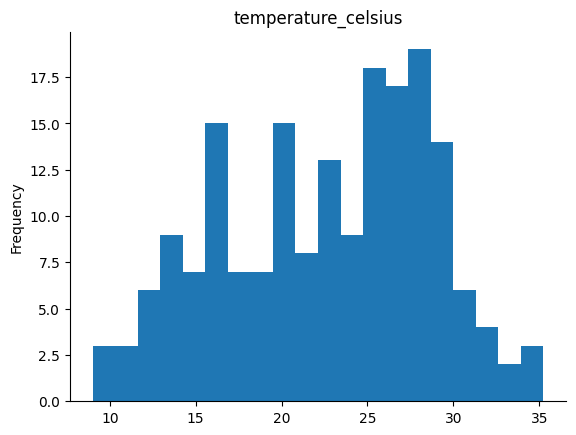

In [ ]:
# @title temperature_celsius

from matplotlib import pyplot as plt
average_temp_per_country['temperature_celsius'].plot(kind='hist', bins=20, title='temperature_celsius')
plt.gca().spines[['top', 'right',]].set_visible(False)

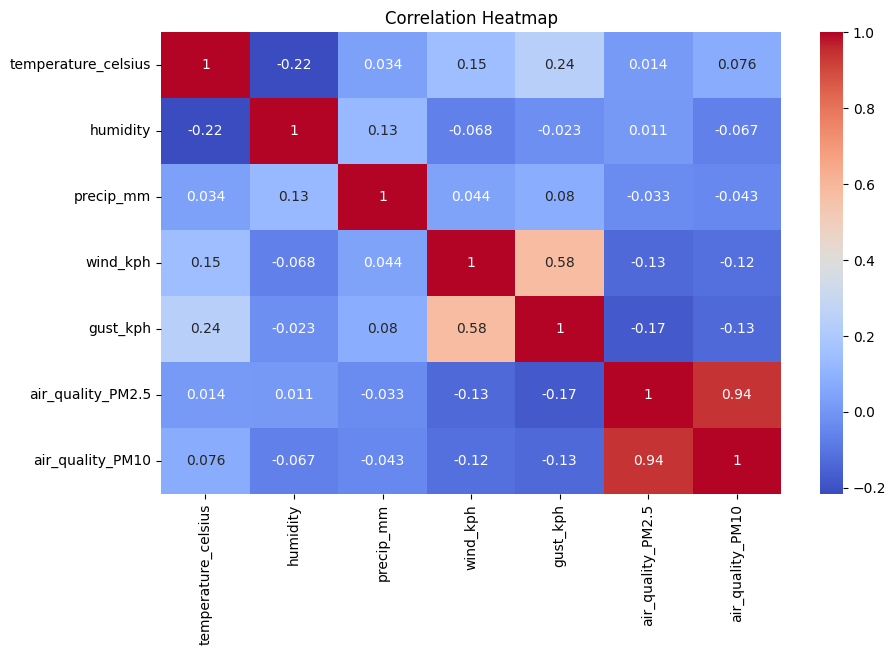

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph',
                  'gust_kph', 'air_quality_PM2.5', 'air_quality_PM10']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

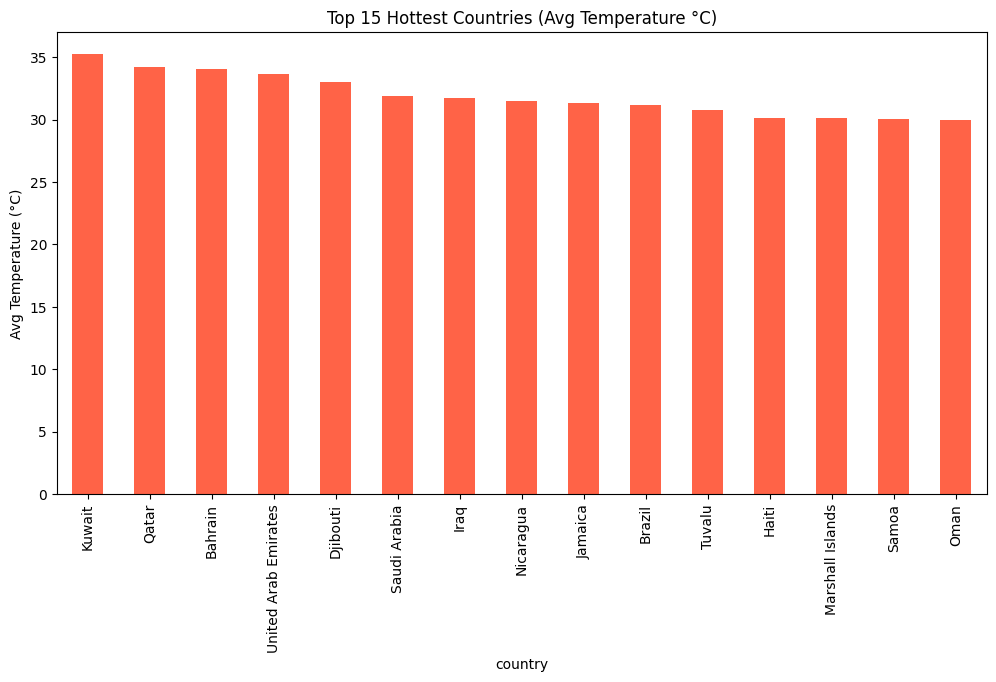

In [ ]:
# 4. Regional Comparisons
# ---------------------------
region_avg = data.groupby('country')[['temperature_celsius', 'precip_mm', 'humidity']].mean().sort_values(by='temperature_celsius', ascending=False)

plt.figure(figsize=(12,6))
region_avg['temperature_celsius'].head(15).plot(kind='bar', color='tomato')
plt.title("Top 15 Hottest Countries (Avg Temperature °C)")
plt.ylabel("Avg Temperature (°C)")
plt.show()


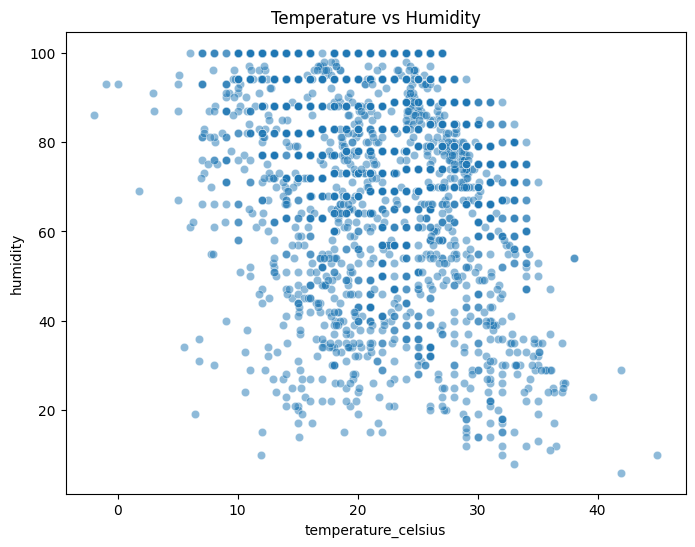

In [ ]:
# 5. Scatterplots & Boxplots
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature_celsius', y='humidity', data=data, alpha=0.5)
plt.title("Temperature vs Humidity")
plt.show()

In [ ]:
import plotly.express as px

# Ensure you have the average_temp_per_country DataFrame from previous steps
if 'average_temp_per_country' in locals() and average_temp_per_country is not None:
    fig = px.choropleth(average_temp_per_country,
                        locations="country",
                        locationmode='country names',
                        color="temperature_celsius",
                        hover_name="country",
                        color_continuous_scale="Plasma",
                        title="Average Temperature per Country")
    fig.show()
else:
    print("Please run the cell to calculate average_temp_per_country first.")

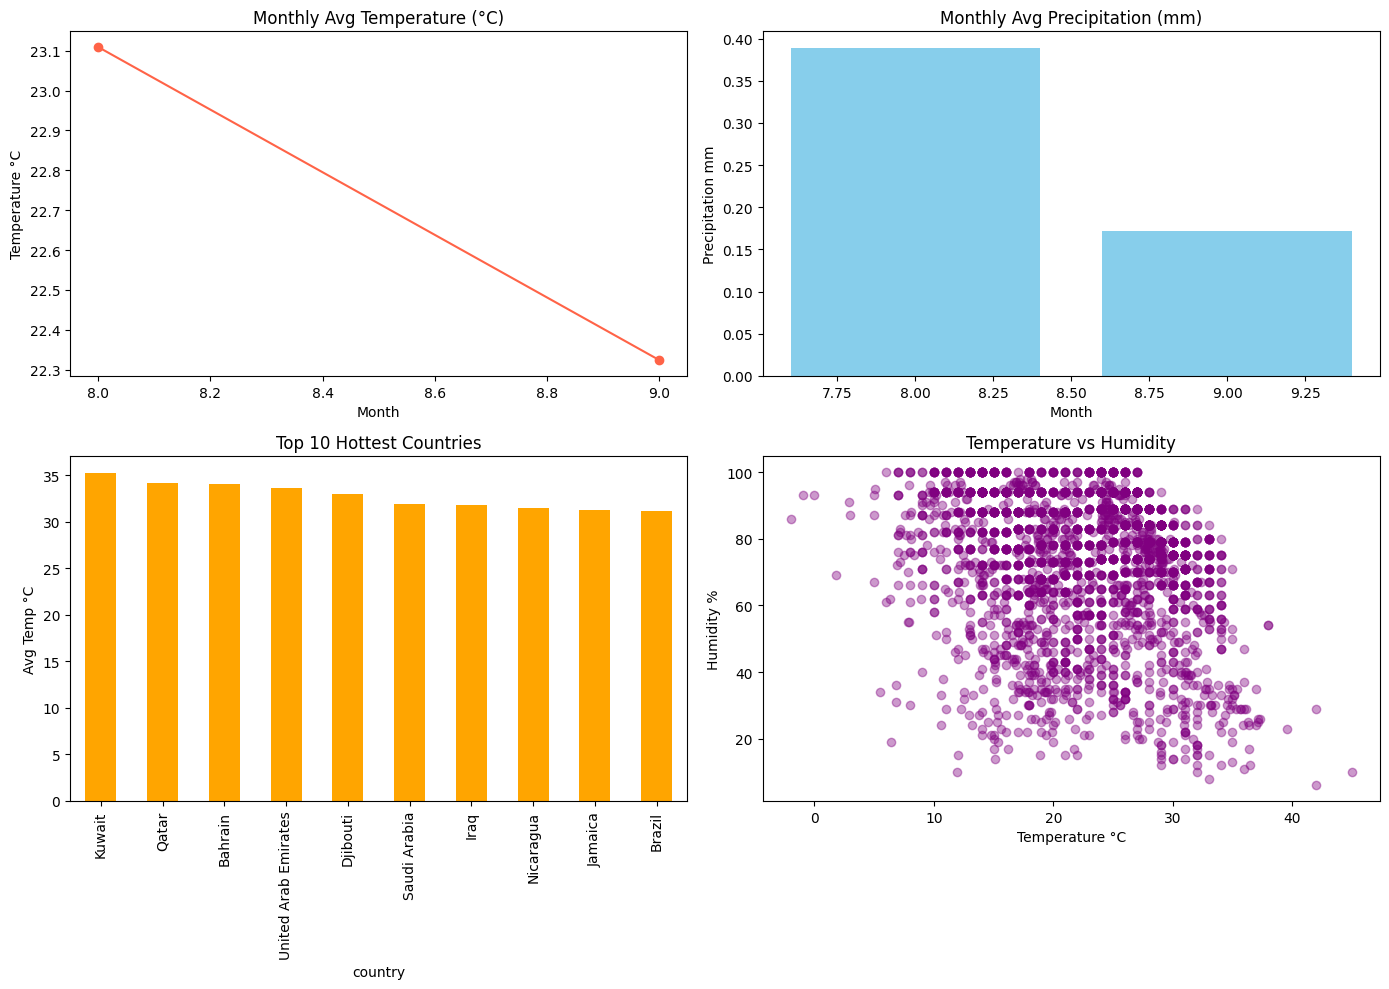

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for mock dashboard
monthly_avg = data.groupby('month')[['temperature_celsius', 'precip_mm']].mean()
region_avg = data.groupby('country')[['temperature_celsius']].mean().sort_values(by='temperature_celsius', ascending=False).head(10)

# Create Dashboard Layout
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Monthly Temperature Trend
axes[0,0].plot(monthly_avg.index, monthly_avg['temperature_celsius'], marker='o', color='tomato')
axes[0,0].set_title("Monthly Avg Temperature (°C)")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Temperature °C")

# 2. Monthly Precipitation Trend
axes[0,1].bar(monthly_avg.index, monthly_avg['precip_mm'], color='skyblue')
axes[0,1].set_title("Monthly Avg Precipitation (mm)")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Precipitation mm")

# 3. Top 10 Hottest Countries
region_avg.plot(kind='bar', ax=axes[1,0], color='orange', legend=False)
axes[1,0].set_title("Top 10 Hottest Countries")
axes[1,0].set_ylabel("Avg Temp °C")

# 4. Temperature vs Humidity Scatter
axes[1,1].scatter(data['temperature_celsius'], data['humidity'], alpha=0.4, color='purple')
axes[1,1].set_title("Temperature vs Humidity")
axes[1,1].set_xlabel("Temperature °C")
axes[1,1].set_ylabel("Humidity %")

plt.tight_layout()
plt.show()


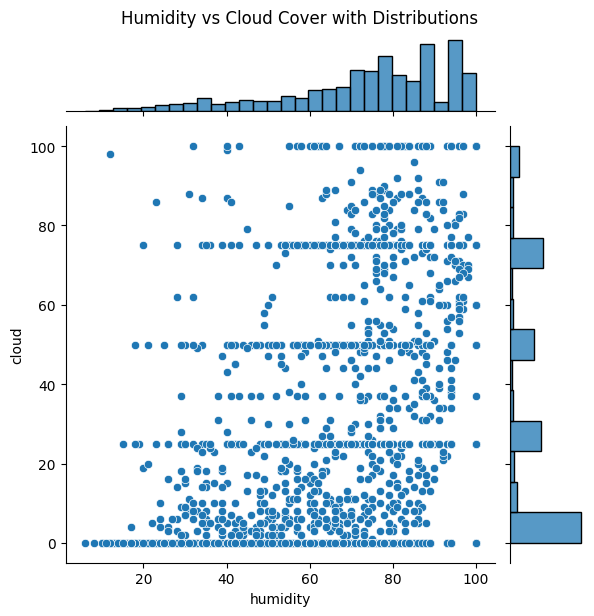

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='humidity', y='cloud', data=data, kind='scatter')
plt.suptitle('Humidity vs Cloud Cover with Distributions', y=1.02)
plt.show()

### Correlation: Wind Speed vs Gust Speed

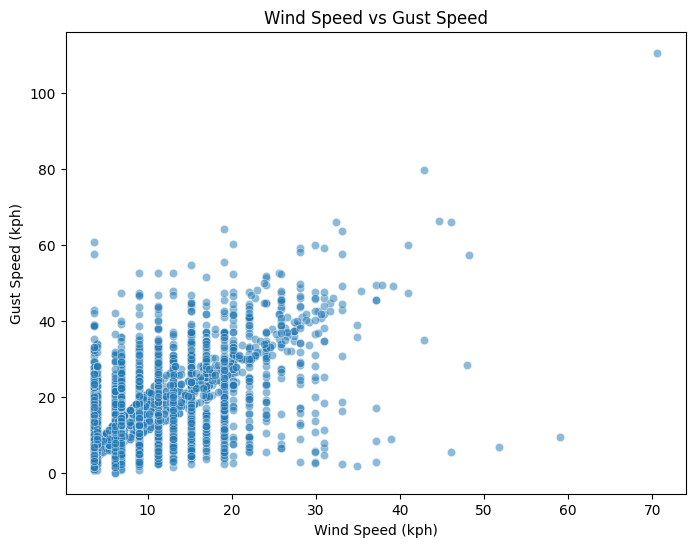

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='wind_kph', y='gust_kph', data=data, alpha=0.5)
plt.title('Wind Speed vs Gust Speed')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Gust Speed (kph)')
plt.show()